# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

In [93]:
# All required libraries are imported here for you.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Write your code here
# checking for missing values
crops.isna().sum()

# checking for crop types
crops['crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [94]:
# Split into feature and target sets
X = crops.drop(columns="crop")
y = crops["crop"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


In [95]:
# Create a dictionary to store the model performance for each feature
feature_performance = {}

# training models for each feature
for feature in ['N', 'P', 'K', 'ph']:
    logreg = LogisticRegression(max_iter=2000, multi_class="multinomial")
    logreg.fit(X_train[[feature]], y_train)
    y_pred = logreg.predict(X_test[[feature]])
    f1 = f1_score(y_test, y_pred, average="weighted")
    feature_performance[feature] = f1  # Store the F1 score in the dictionary
    print(f"F1-score for {feature}: {f1}")

# K produced the best F1 score
# Store in best_predictive_feature dictionary
best_predictive_feature = {"K": feature_performance["K"]}
best_predictive_feature

F1-score for N: 0.10507916708090527
F1-score for P: 0.10457380486654515
F1-score for K: 0.2007873036107074
F1-score for ph: 0.04532731061152114


{'K': 0.2007873036107074}

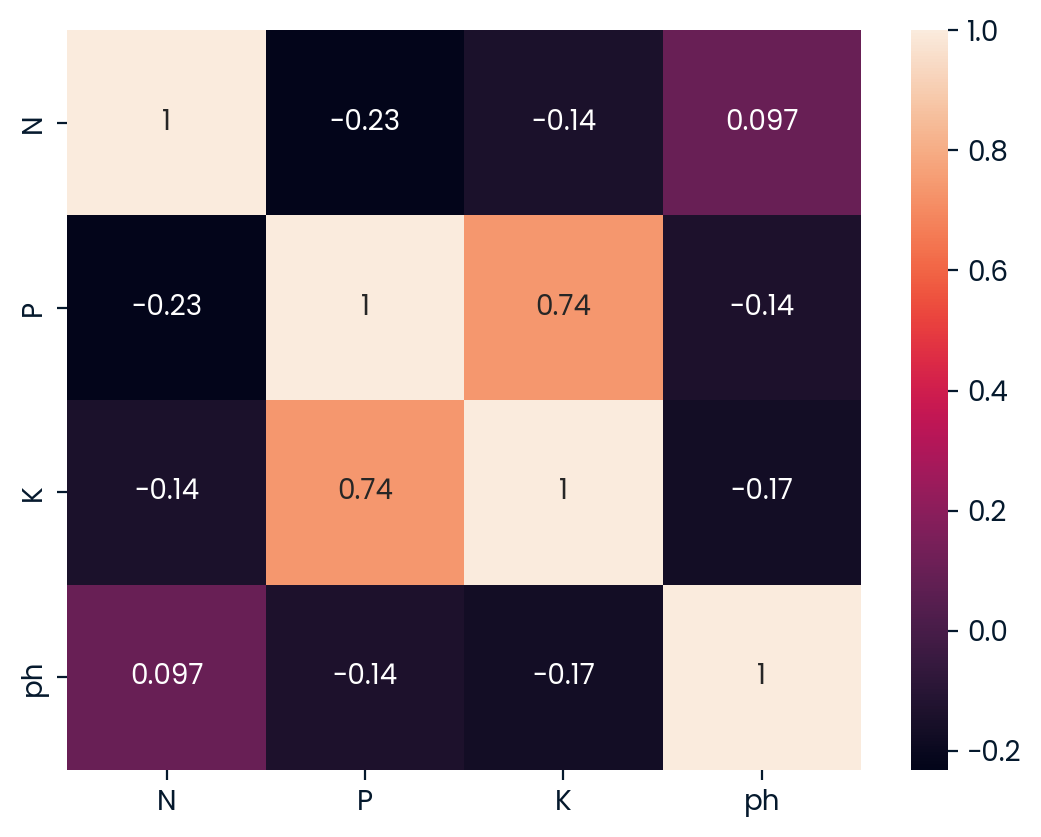

In [96]:
# correlation analysis
crops_corr = crops[["N", "P", "K", "ph"]].corr()
sns.heatmap(crops_corr, annot=True)
plt.show()